In [1]:
import os

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# What the hell is this ?<br>
### It's a penguin ? Its a Elephant ? 
### It's PAUL!!

(-0.5, 1499.5, 999.5, -0.5)

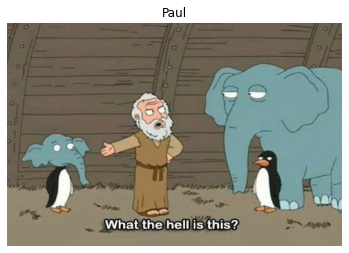

In [3]:
paul_path = "./extras/paul.jpg"

img = keras.preprocessing.image.load_img(
    paul_path, target_size=(1000, 1500)
)
img_array = keras.preprocessing.image.img_to_array(img)
plt.figure(figsize=(6, 6))
plt.imshow(img_array.astype("uint8"))
plt.title("Paul")
plt.axis("off")

In [4]:
img_height = 28
img_width = 28
batch_size = 2

model = keras.Sequential(
    [
        layers.Input((img_height, img_width, 3)),
        layers.Conv2D(16, 3, padding="same"),
        layers.Conv2D(32, 3, padding="same"),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(2),
    ]
)


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [6]:
batch_size = 32
img_height = 180
img_width = 180

In [7]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "data/",
    labels="inferred",
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(img_height, img_width),  # reshape if not in this size
    shuffle=True,
    seed=123,
    validation_split=0.1,
    subset="training",
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "data/",
    labels="inferred",
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(img_height, img_width),  # reshape if not in this size
    shuffle=True,
    seed=123,
    validation_split=0.1,
    subset="validation",
)

Found 300 files belonging to 2 classes.
Using 270 files for training.
Found 300 files belonging to 2 classes.
Using 30 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['elephant', 'penguin']


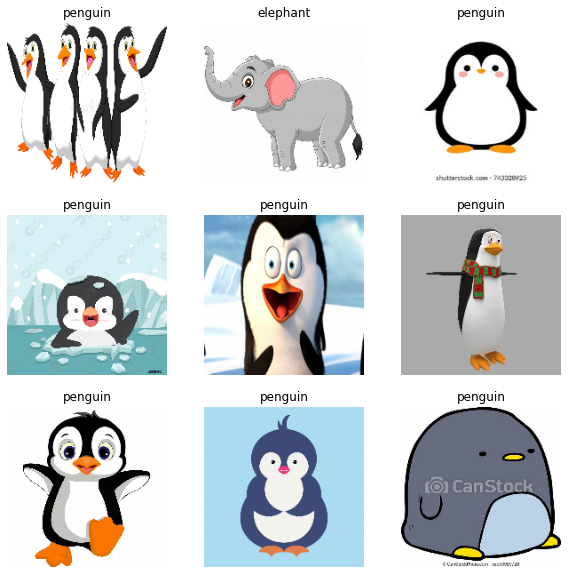

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [10]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [11]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [12]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [13]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.0 1.0


In [14]:
num_classes = 2

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [15]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

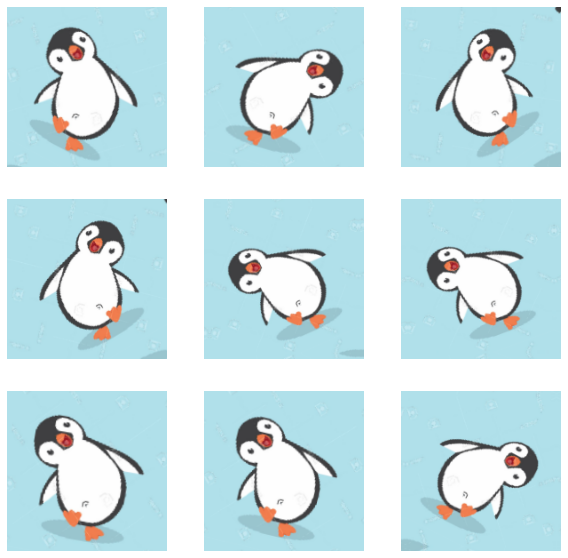

In [16]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [17]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 45, 45, 64)       

In [20]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
9/9 [==============================] - 7s 718ms/step - loss: 2.7444 - accuracy: 0.4752 - val_loss: 0.7380 - val_accuracy: 0.3667
Epoch 2/15
9/9 [==============================] - 5s 528ms/step - loss: 0.6785 - accuracy: 0.5422 - val_loss: 0.6974 - val_accuracy: 0.3667
Epoch 3/15
9/9 [==============================] - 5s 546ms/step - loss: 0.6034 - accuracy: 0.6159 - val_loss: 0.7897 - val_accuracy: 0.6333
Epoch 4/15
9/9 [==============================] - 5s 533ms/step - loss: 0.3996 - accuracy: 0.8784 - val_loss: 1.1308 - val_accuracy: 0.7667
Epoch 5/15
9/9 [==============================] - 5s 529ms/step - loss: 0.2571 - accuracy: 0.9346 - val_loss: 0.9375 - val_accuracy: 0.8000
Epoch 6/15
9/9 [==============================] - 5s 566ms/step - loss: 0.1910 - accuracy: 0.9008 - val_loss: 1.3381 - val_accuracy: 0.7667
Epoch 7/15
9/9 [==============================] - 5s 560ms/step - loss: 0.1630 - accuracy: 0.9355 - val_loss: 0.3971 - val_accuracy: 0.9000
Epoch 8/15
9/9 [====

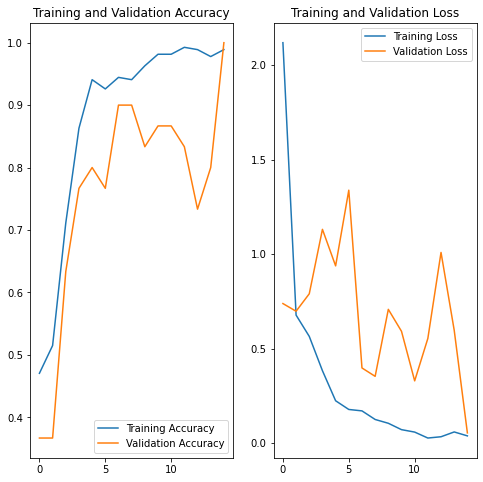

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

This image most likely belongs to elephant with a 78.17 percent confidence.


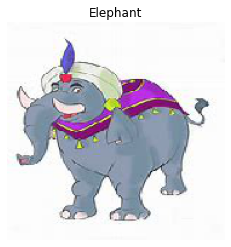

In [23]:
elephant_path = "./extras/sample_elephant.jpg"

img = keras.preprocessing.image.load_img(
    elephant_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
plt.figure(figsize=(4, 4))
plt.imshow(img_array.astype("uint8"))
plt.title("Elephant")
plt.axis("off")

img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to penguin with a 100.00 percent confidence.


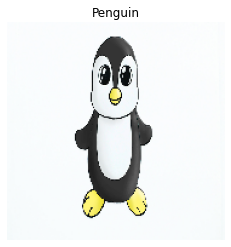

In [27]:
penguin_path = "./extras/sample_penguin.jpg"

img = keras.preprocessing.image.load_img(
    penguin_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
plt.figure(figsize=(4, 4))
plt.imshow(img_array.astype("uint8"))
plt.title("Penguin")
plt.axis("off")

img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to penguin with a 54.10 percent confidence.


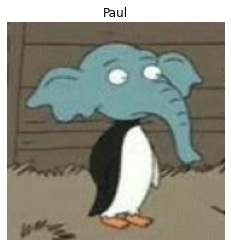

In [26]:
paul_path = "./extras/only_paul.jpg"

img = keras.preprocessing.image.load_img(
    paul_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
plt.figure(figsize=(4, 4))
plt.imshow(img_array.astype("uint8"))
plt.title("Paul")
plt.axis("off")


img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)